In [48]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import os.path as osp
import sys
sys.path.insert(0, osp.abspath(".."))
from utils import *
import seaborn as sns
from dataloader import *
import pandas as pd

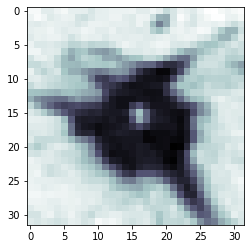

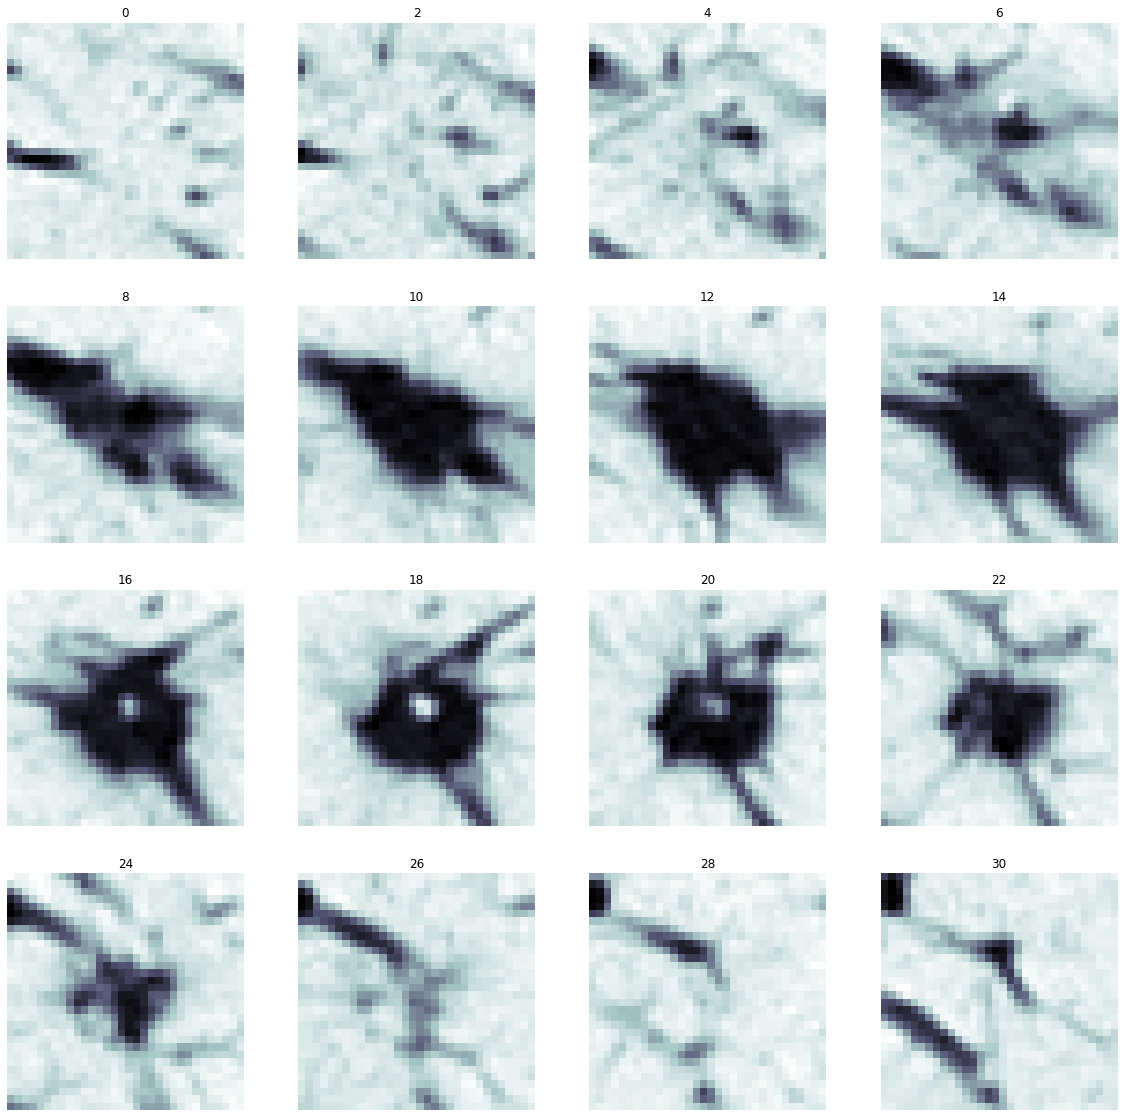

In [40]:
file_path = "/home/hthieu/data/crop/1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149938600000570588203-9-9-9-9-9-9-9-9-9-9-9-9.npy"
nod_npy   = np.load(file_path)
plt.figure(figsize=(4,4))
ax  = plt.gca()
ax.imshow(nod_npy[15,:,:], cmap="bone")
plot_slices(nod_npy[::-1,:,:], 0)

In [111]:
test_fold = 1
exp_id    = "multi-views-expr-4"
feats = np.load("../log/infer-%s/deep-feat-%d.npy" %(exp_id, test_fold))
preds = np.argmax(np.load("../log/infer-%s/preds-%d.npy"%(exp_id, test_fold)), axis=1)
teidlst = []
with open(osp.join("../subsets", "subset{}.txt".format(str(test_fold)))) as fo:
    teidlst += [i.strip() for i in fo.readlines()]
gts = []
nod_ids = []
for sid, gt in zip(df['seriesuid'].tolist()[1:], df['malignant'].tolist()[1:]):
    if sid.split('-')[0] in teidlst:
        gts.append(int(gt))
        nod_ids.append(sid)
gts = np.array(gts)
nod_ids = np.array(nod_ids)
incorrect_preds = np.where(preds != gts)[0]

In [137]:
def plot_nodule_img(ax, idx,  nods_lst, gts, img_dir = "/home/hthieu/data/crop/"):
    nod_npy   = np.load(osp.join(img_dir, nods_lst[idx]+".npy"))
    ax.add_patch(patches.Rectangle((0,0),31, 31,linewidth=5, edgecolor="red" if gts[idx] == 1 else "green", facecolor='none'))
    ax.imshow(nod_npy[15,:,:], cmap = "bone")
    ax.axis("off")
    ax.set_title(str(idx))

def plot_feature_vector(ax, idx, feats,preds, gts):
    sns.heatmap(feats[:,idx,:].T, ax = ax,
                    vmin =0, vmax=2.5, cbar=False)
    ax.add_patch(patches.Rectangle((0,0),4, 8,linewidth=8, edgecolor="red" if gts[idx] == 1 else "green", facecolor='none'))
    ax.set_title("%d-[%d|%d]" %(idx, preds[idx], gts[idx]))
    ax.set_xticklabels(["o", "x", "y","z"])
    ax.vlines(np.arange(5), *ax.get_ylim(), color="yellow")
    
def plot_imgs_grid(viz_func, viz_lst, *kwarg, nrows=2, ncols=8):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols *4,nrows *4))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = (i * n_cols +j)
            if idx >= len(viz_lst):
                return
            viz_func(axs[i,j],  viz_lst[idx], *kwarg)

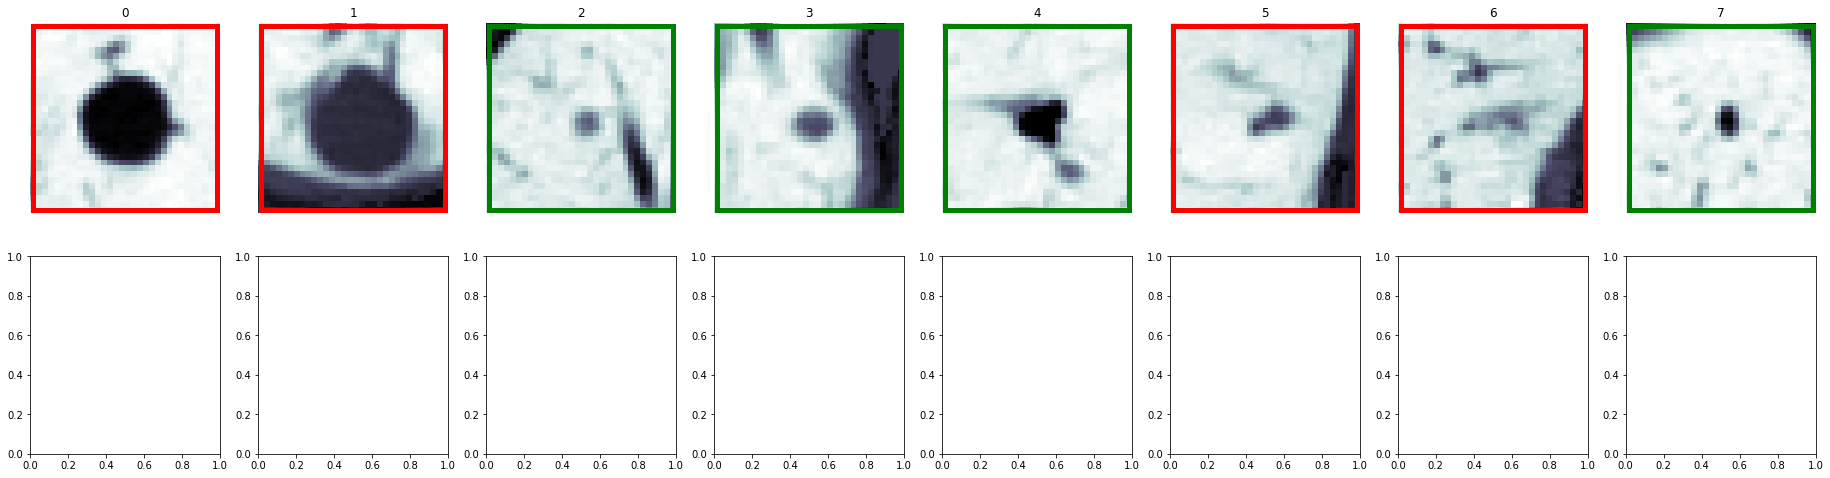

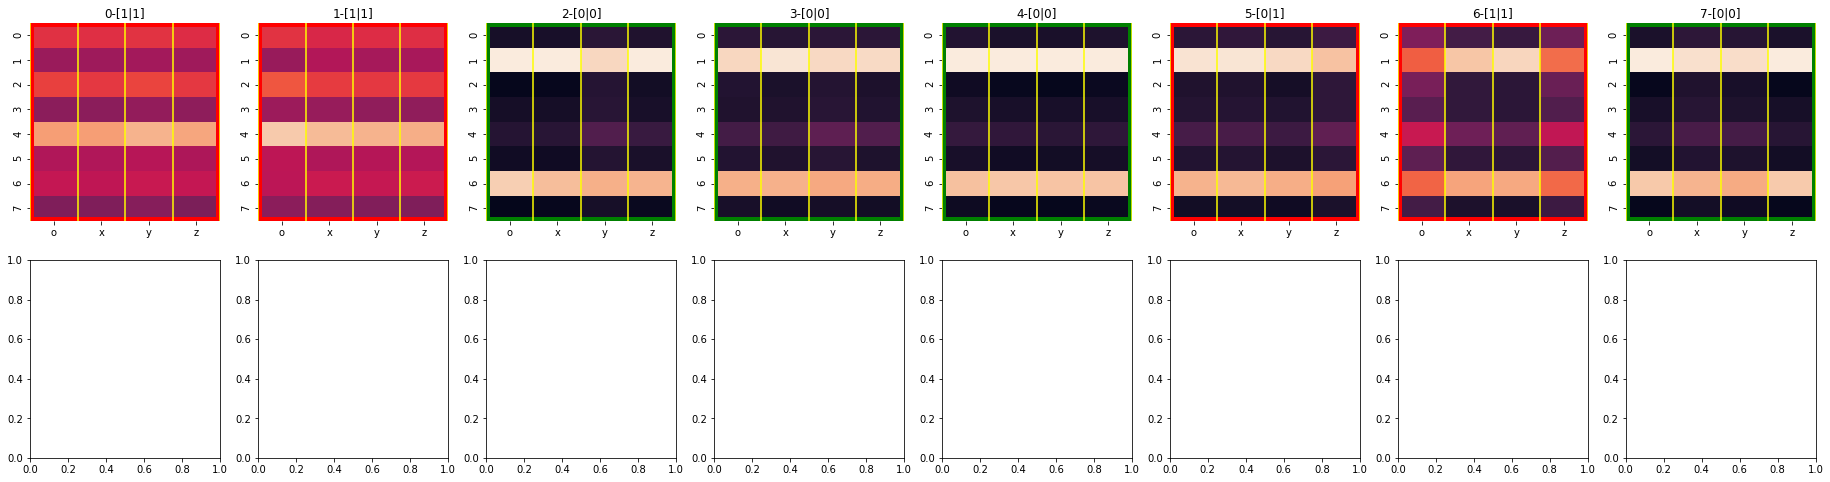

In [138]:
viz_lst = np.arange(8)
plot_imgs_grid(plot_nodule_img, viz_lst , nod_ids, gts, nrows=2, ncols=8)
plot_imgs_grid(plot_feature_vector, viz_lst, feats, preds, gts, nrows=2, ncols=8)

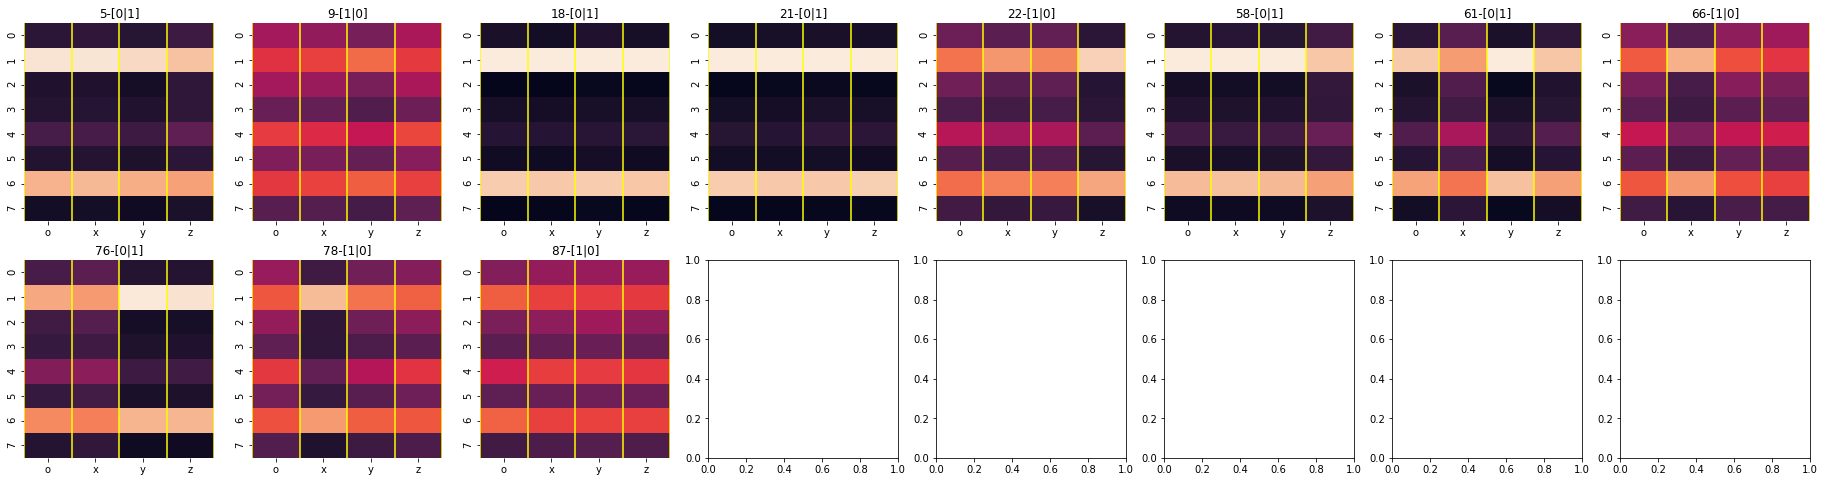

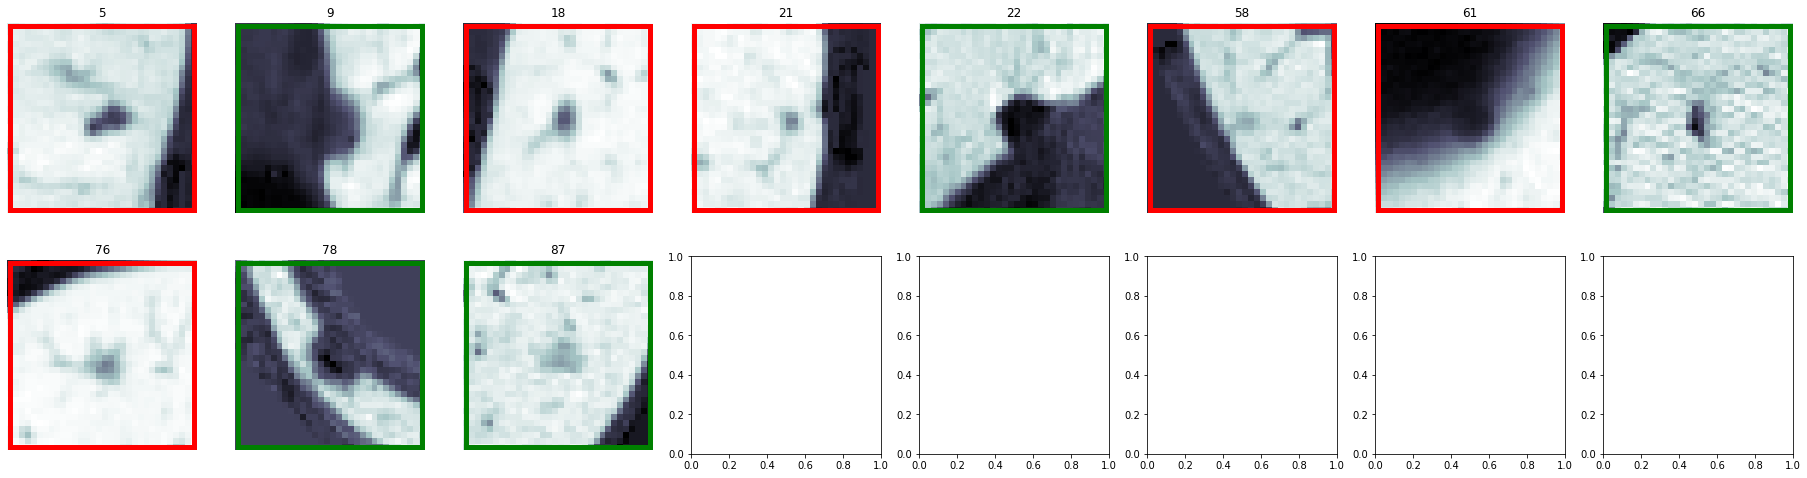

In [114]:
plot_imgs_grid(plot_feature_vector, incorrect_preds, feats, preds, gts, nrows = 2, ncols=8)
plot_imgs_grid(plot_nodule_img,  incorrect_preds, nod_ids, gts, nrows=2, ncols=8)